## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
df=pd.read_csv('diabetes.csv')

In [100]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [103]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot: >

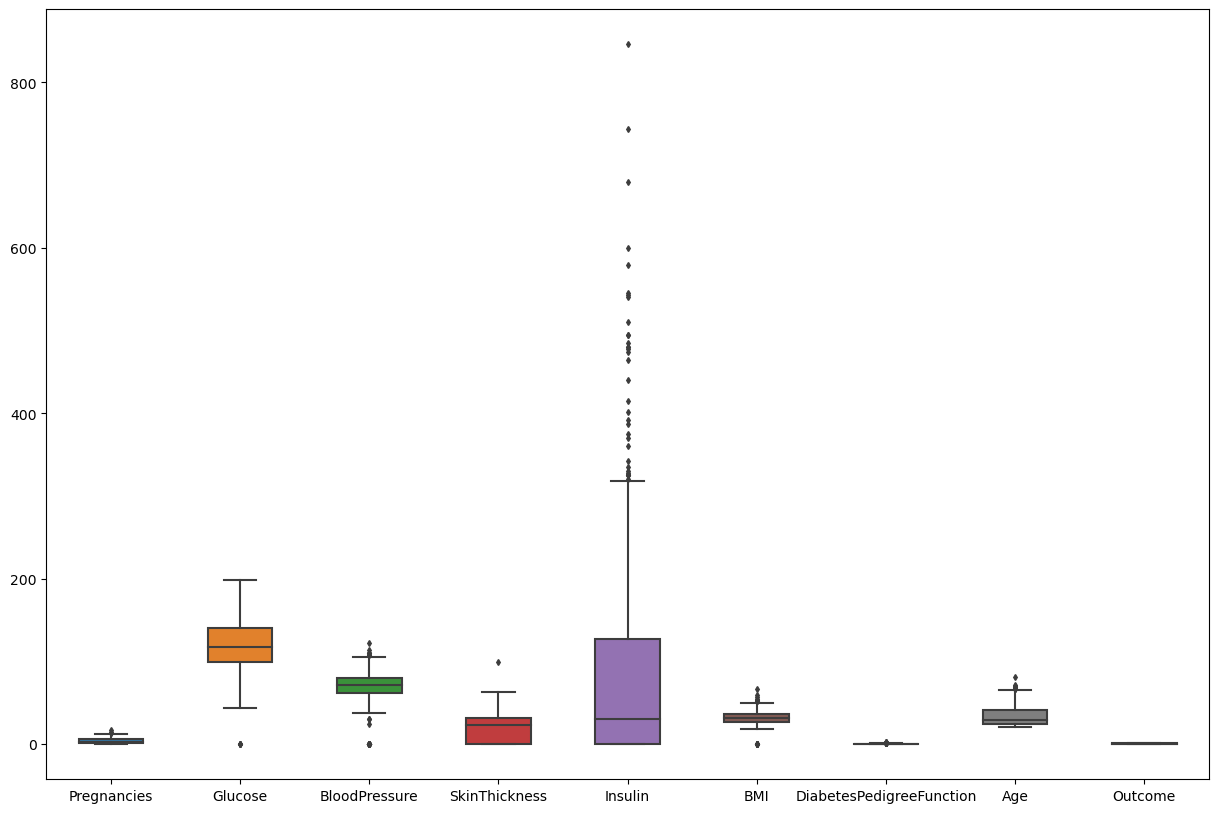

In [104]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [105]:
# Above graph says that Insulin has may outliers

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [106]:
# Glucose, BloodPressure, SkinThickness, Insuline and BMI can not 0 for any one so we need replace with mean valuse 
# of those perticulker fields 

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

<AxesSubplot: >

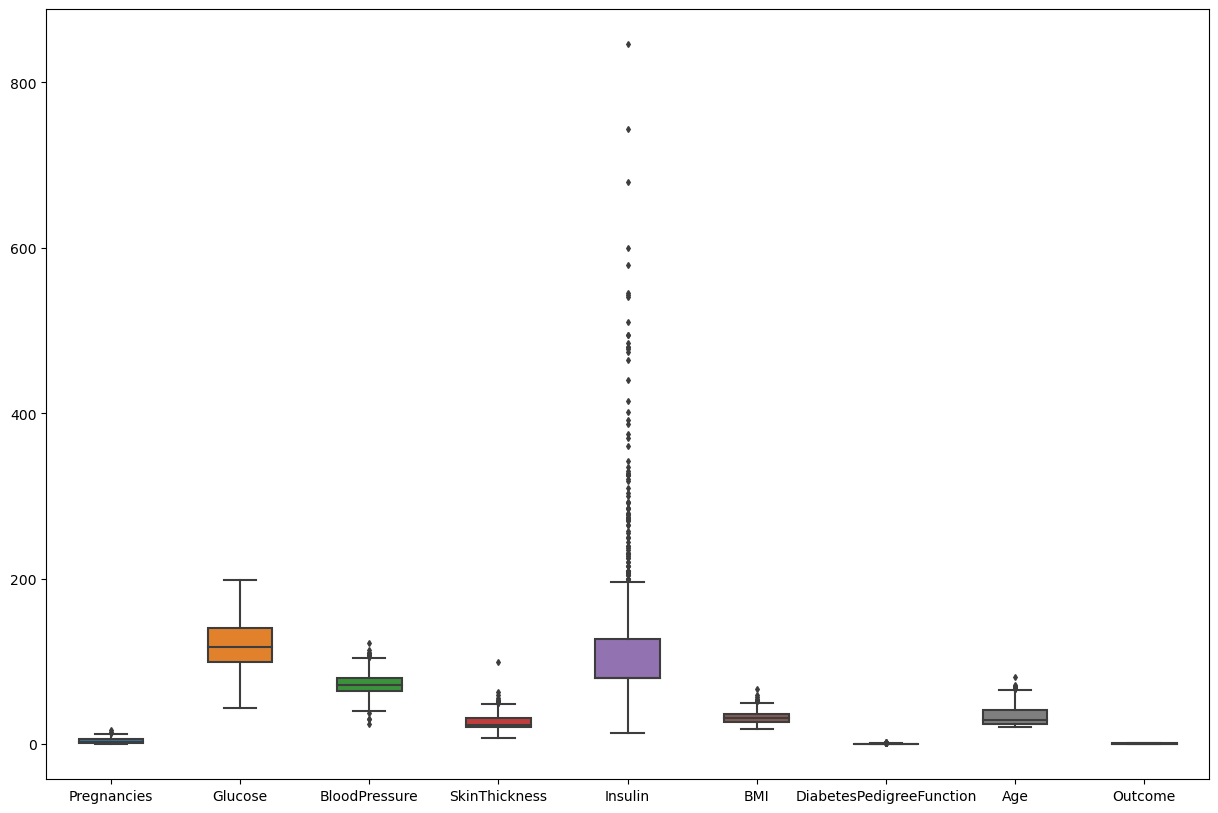

In [107]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [108]:
# From above graph we can see that for Insulin there are many outlier ranging from 200 to 800
# For now will keep these data as it is

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [109]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [110]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115.0,98.000000,20.536458,79.799479,24.0,1.022,34
223,7,142.0,60.000000,33.000000,190.000000,28.8,0.687,61
393,4,116.0,72.000000,12.000000,87.000000,22.1,0.463,37
766,1,126.0,60.000000,20.536458,79.799479,30.1,0.349,47
570,3,78.0,70.000000,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.000000,140.000000,28.6,0.411,26
106,1,96.0,122.000000,20.536458,79.799479,22.4,0.207,27
270,10,101.0,86.000000,37.000000,79.799479,45.6,1.136,38
435,0,141.0,69.105469,20.536458,79.799479,42.4,0.205,29


In [111]:
y_train

464    0
223    0
393    0
766    1
570    0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 514, dtype: int64

## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [149]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [150]:
treeClassifier=DecisionTreeClassifier()

In [151]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115.0,98.000000,20.536458,79.799479,24.0,1.022,34
223,7,142.0,60.000000,33.000000,190.000000,28.8,0.687,61
393,4,116.0,72.000000,12.000000,87.000000,22.1,0.463,37
766,1,126.0,60.000000,20.536458,79.799479,30.1,0.349,47
570,3,78.0,70.000000,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.000000,140.000000,28.6,0.411,26
106,1,96.0,122.000000,20.536458,79.799479,22.4,0.207,27
270,10,101.0,86.000000,37.000000,79.799479,45.6,1.136,38
435,0,141.0,69.105469,20.536458,79.799479,42.4,0.205,29


In [152]:
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

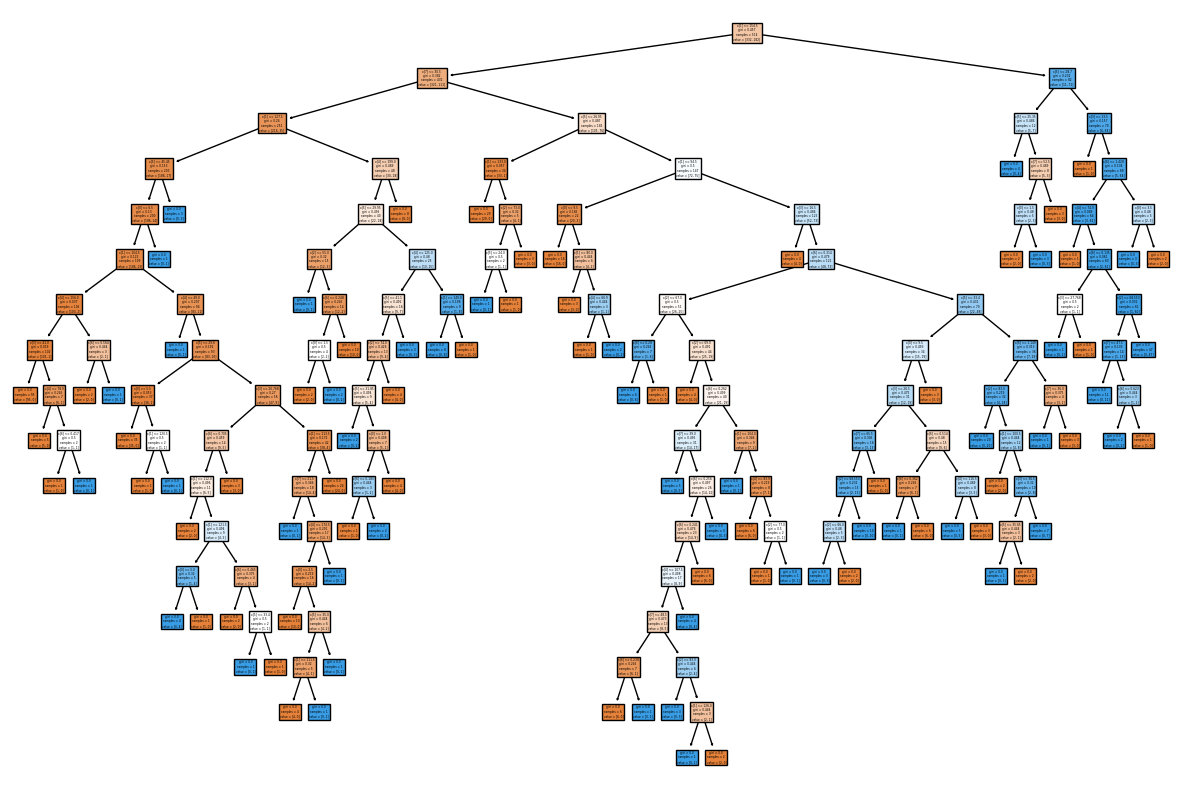

In [153]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(treeClassifier,filled=True)
plt.show()

In [154]:
y_pred=treeClassifier.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score,classification_report

In [156]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.6929133858267716
              precision    recall  f1-score   support

           0       0.68      0.82      0.75       140
           1       0.71      0.54      0.61       114

    accuracy                           0.69       254
   macro avg       0.70      0.68      0.68       254
weighted avg       0.70      0.69      0.69       254



In [157]:
# Accuracy is seems to good we can try to optimize the model with hyperperemeters to avoid over fitting

In [158]:
import warnings
warnings.filterwarnings('ignore')

parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
treeClassifier2=DecisionTreeClassifier()
clf=GridSearchCV(treeClassifier2,param_grid=parameter,cv=5,scoring='accuracy')

In [161]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [162]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'best'}

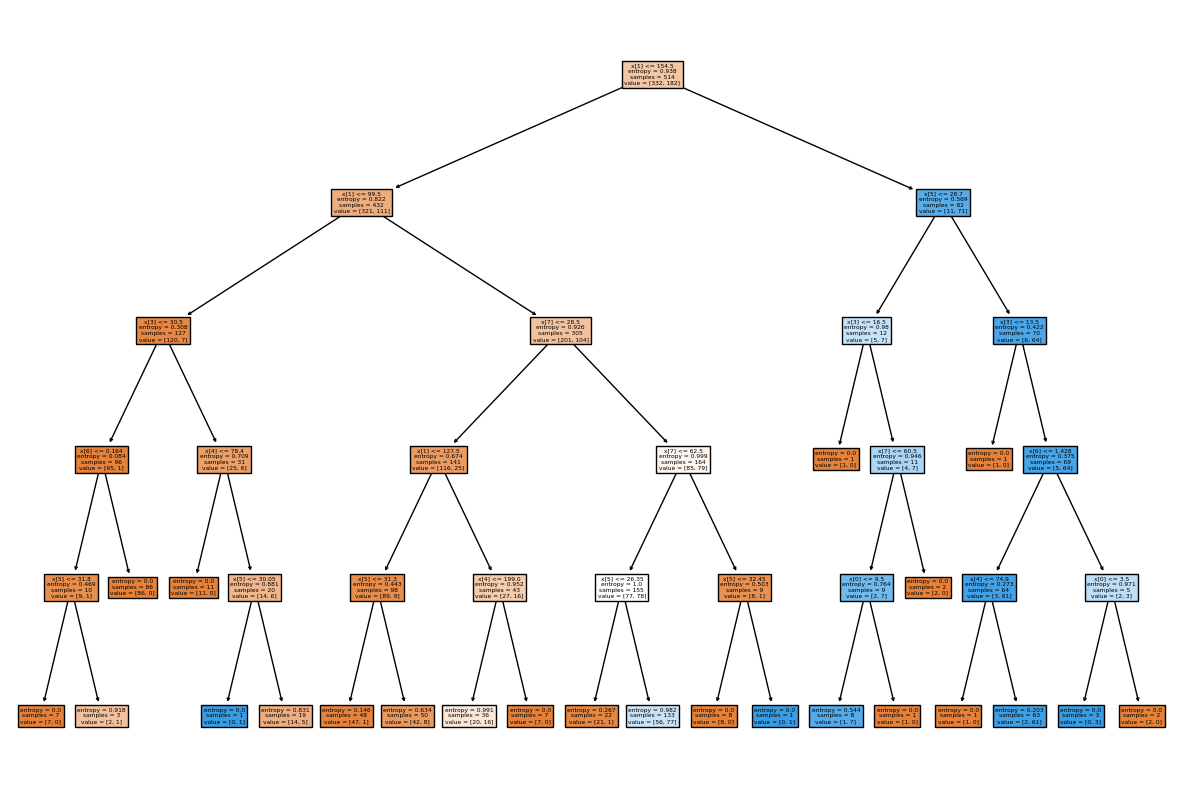

In [163]:

treeClassifier2=DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features='log2',splitter='best')

treeClassifier2.fit(X_train,y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(treeClassifier2,filled=True)
plt.show()

In [164]:
y_pred=treeClassifier2.predict(X_test)

In [165]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7283464566929134
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       145
           1       0.73      0.58      0.65       109

    accuracy                           0.73       254
   macro avg       0.73      0.71      0.71       254
weighted avg       0.73      0.73      0.72       254



## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.72
Precision: 0.60
Recall: 0.50
F1 Score: 0.54


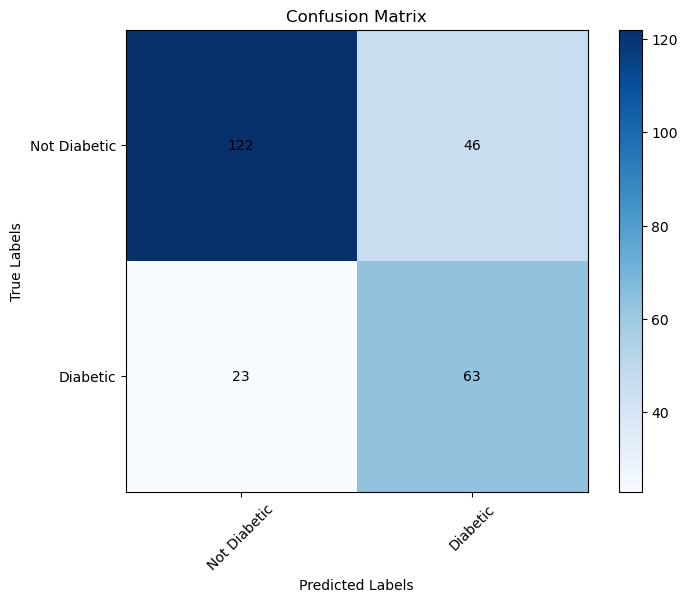

In [166]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Not Diabetic', 'Diabetic']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the confusion matrix values on the plot
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

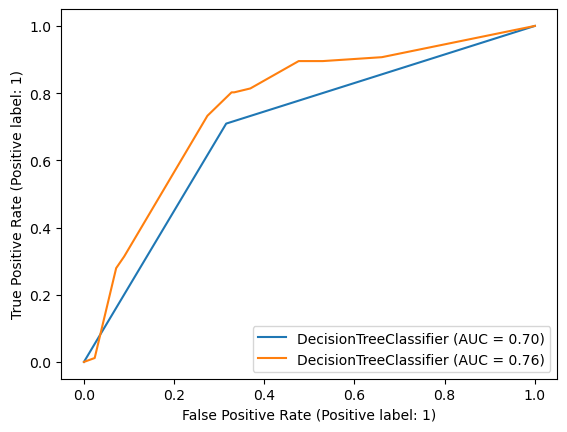

In [167]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(treeClassifier, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(treeClassifier2, X_test, y_test, ax=svc_disp.ax_)

## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [ ]:
Interpreting a decision tree involves examining the splits, branches, and leaves to understand how the model is making decisions. 
In this case, we'll interpret the decision tree for the diabetes dataset to identify the most important variables and their thresholds. 
Keep in mind that the interpretation might not provide the exact variable thresholds as this can vary between different runs or versions of 
the model. However, we can gain insights into the general patterns and trends.

Here's a step-by-step interpretation of the decision tree for the diabetes dataset:

Root Node (First Split):

    The root node represents the initial decision point.
    It is the most important variable for the first split.
    The threshold value in the root node is used to divide the dataset into two child nodes.

Child Nodes (Subsequent Splits):

    Each child node represents a further decision point based on a specific condition.
    The decision tree continues to split the dataset into more child nodes until a stopping criterion is met.

Thresholds:

    The threshold values in each node represent the cutoff point for a particular feature.
    For numeric features (e.g., glucose level, BMI), the threshold indicates when a patient's value is above or below a certain point.
    For categorical features (e.g., gender, medication), the threshold represents a specific category or condition.

Leaf Nodes (End of Branches):

    Leaf nodes are the final outcomes or predictions made by the model.
    Each leaf node corresponds to a predicted class (e.g., diabetic or non-diabetic) or a probability distribution.

Impurity Measures:

    Decision trees aim to minimize impurity or uncertainty at each split.
    Common impurity measures include Gini impurity and entropy.
    Splits with lower impurity are preferred as they provide more distinct separation of classes.

Variable Importance:

    You can gauge the importance of each variable by observing how early it appears in the tree and how many times it is used for splits.
    Variables near the root or used multiple times are more critical in making predictions.

Patterns and Trends:

    Interpretation should consider domain knowledge and common sense.
    For example, if glucose level is a critical early split, it suggests that glucose plays a significant role in diabetes prediction.
    Threshold values can indicate specific health conditions (e.g., glucose levels above a certain point may indicate diabetes).

It's important to note that interpreting decision trees can sometimes be complex, especially with deeper trees. Additionally, decision trees 
are sensitive to the dataset and may change with different data or model settings. Therefore, interpretation should be done cautiously, and 
domain knowledge should guide the analysis.

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [168]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


In [170]:
LastData=treeClassifier.predict([[1,93.0,70.0,31.00,79.799,30.4,0.315,23]])
LastData

array([0])

In [172]:
SecondLast=treeClassifier.predict([[1,	126.0	,60.0,	20.536458	,79.799479	,30.1	,0.349	,47	]])
SecondLast

array([1])

In [177]:
RandomPoint=treeClassifier.predict([df.iloc[126,:-1]])
RandomPoint

array([0])

In [178]:
df.iloc[126]

Pregnancies                   3.000
Glucose                     120.000
BloodPressure                70.000
SkinThickness                30.000
Insulin                     135.000
BMI                          42.900
DiabetesPedigreeFunction      0.452
Age                          30.000
Outcome                       0.000
Name: 126, dtype: float64

In [179]:
## As we can see with random data point from the dataser we are able to predict correct output.

In [ ]:
Sensitivity analysis and scenario testing can help explore the model's behavior under different conditions, identify potential risks, and
assess its robustness. 

Sensitivity Analysis:

    Conduct sensitivity analysis by varying key parameters, thresholds, or features to assess how changes affect the model's predictions.
    For example, you can:
        Adjust the threshold for the target variable (e.g., diabetes threshold).
        Modify the maximum depth of the decision tree.
        Change the impurity measure used for splitting nodes (e.g., Gini impurity, entropy).
        Add or remove features to see their impact on predictions.

Scenario Testing:

    Create hypothetical scenarios or test cases to assess the model's behavior in different situations.
    For example, consider scenarios where:
        Certain features have extreme values or are missing.
        Data quality issues exist, such as outliers or noise.
        Environmental conditions change (e.g., different healthcare settings).
        Distributional shifts occur in the data (e.g., changes in patient demographics).

Risk Assessment:

    Identify potential risks associated with the model's predictions and decision-making.
    Assess how sensitive the model is to these risks.
    Develop mitigation strategies for high-risk scenarios.